# To be, or not to be
- EECS 731 Project 2
- Author: Lazarus
- ID : 3028051
 
## Problem Statement
### Classy Shakespeare plays and players
- Set up a data science project structure in a new git repository in your GitHub account
- Download the Shakespeare plays dataset from https://www.kaggle.com/kingburrito666/shakespeare-plays
- Load the data set into panda data frames
- Formulate one or two ideas on how feature engineering would help the data set to establish additional value using exploratory data analysis
- Build one or more classification models to determine the player using the other columns as features
- Document your process and results
- Commit your notebook, source code, visualizations and other supporting files to the git repository in GitHub

## Data Description

###### This is a dataset comprised of all of Shakespeare's plays. It includes the following:

- The first column is the Data-Line, it just keeps track of all the rows there are.
- The second column is the play that the lines are from.
- The third column is the actual line being spoken at any given time.
- The fourth column is the Act-Scene-Line from which any given line is from.
- The fifth column is the player who is saying any given line.
- The sixth column is the line being spoken.

## What we want to do?
- Main goal: to use different Classification model to determine Player.
- First we shall go through dataset and understand what features can we use to maximize our accuracy of classifying

## Step 1: Lets prepare working environment
- Import all libraries required in the initial stage for data exploration and feature engineering
- Loading data from csv to a pandas dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("../data/Shakespeare_data.csv")
data.tail(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.
111395,111396,A Winters Tale,38.0,NaN,LEONTES,Exeunt


## Step 2: Treating missing values

- Removed all attributes with incomplete data

In [3]:
print("::::::::before:::::::::::")
print(data.isnull().sum())
data=data.dropna()
print("::::::::after::::::::::::")
print(data.isnull().sum())

::::::::before:::::::::::
Dataline               0
Play                   0
PlayerLinenumber       3
ActSceneLine        6243
Player                 7
PlayerLine             0
dtype: int64
::::::::after::::::::::::
Dataline            0
Play                0
PlayerLinenumber    0
ActSceneLine        0
Player              0
PlayerLine          0
dtype: int64


## Step 3: Data Exploration

#### Let's find how many plays and how many players we are dealing with:

In [4]:
print("Total number of plays are: " + str(data['Play'].nunique()))
print("Total number of players are: " + str(data['Player'].nunique()))

Total number of plays are: 36
Total number of players are: 934


- So our model should classify these 934 players from 36 plays'
#### Let's check how many players each play has:

In [5]:
numberPlayers = data.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
print(numberPlayers)

    Num Players                      Play
0            70               Richard III
1            65           Henry VI Part 2
2            61                Coriolanus
3            55           Timon of Athens
4            54      Antony and Cleopatra
5            52           Henry VI Part 1
6            50             Julius Caesar
7            48                  Pericles
8            47                Henry VIII
9            47                   Henry V
10           46           Henry VI Part 3
11           41                   macbeth
12           40                 Cymbeline
13           37          Romeo and Juliet
14           37       Taming of the Shrew
15           36                Richard II
16           35                  Henry IV
17           35            A Winters Tale
18           34                    Hamlet
19           30  A Midsummer nights dream
20           29                 King John
21           29      Troilus and Cressida
22           28                   

#### Visualising above data to understand better

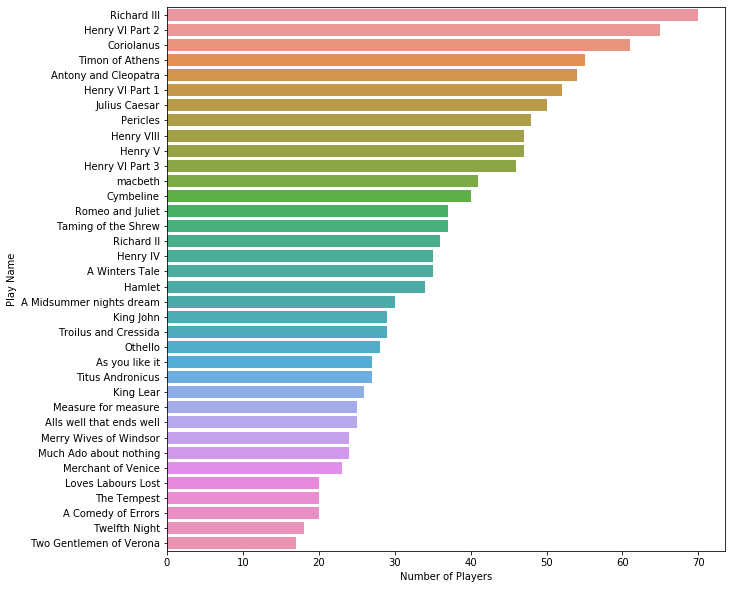

In [6]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Num Players',y='Play',data=numberPlayers)
ax.set(xlabel='Number of Players', ylabel='Play Name')
plt.show()

- Every play has atleast 15 players.
- Some of them have above 50 players too.

#### Let's check  how many attributes of data we have for every play

In [7]:
Play_Count =data['Play'].value_counts()
Play_Count

Hamlet                      4020
Coriolanus                  3768
Cymbeline                   3756
Richard III                 3705
Antony and Cleopatra        3565
Othello                     3563
King Lear                   3500
Troilus and Cressida        3491
A Winters Tale              3364
Henry VIII                  3279
Henry V                     3233
Henry VI Part 2             3130
Romeo and Juliet            3096
Henry IV                    3044
Henry VI Part 3             2939
Alls well that ends well    2925
Loves Labours Lost          2878
Measure for measure         2840
Richard II                  2800
Henry VI Part 1             2777
As you like it              2677
Merchant of Venice          2665
King John                   2649
Taming of the Shrew         2637
Merry Wives of Windsor      2614
Julius Caesar               2597
Much Ado about nothing      2584
Titus Andronicus            2559
Timon of Athens             2500
Twelfth Night               2483
Pericles  

#### Visualizing above data to understand better

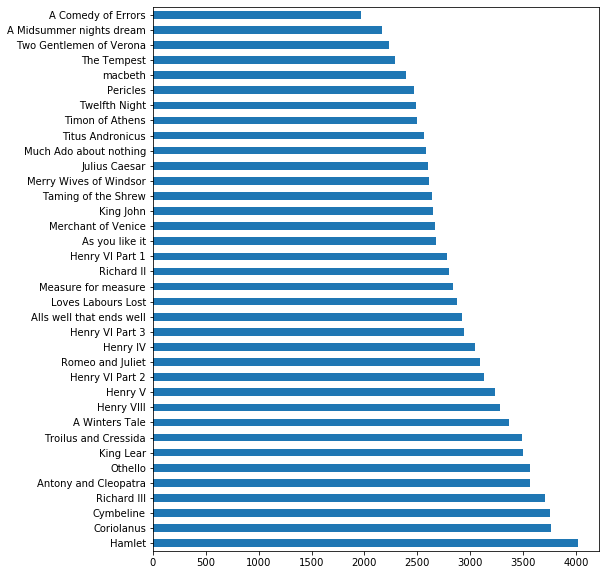

In [8]:
Play_Count.plot(kind='barh',label='Play Count',figsize=(8,10))

- It's good that we have atleast 1500 attributes for every play because more data implies more accuracy for classification models.

#### Let's also check how many attributes of data we have for every player

In [9]:
Player_Count =data['Player'].value_counts()[:30]
Player_Count

GLOUCESTER          1811
HAMLET              1503
IAGO                1101
FALSTAFF            1053
KING HENRY V        1029
BRUTUS               976
OTHELLO              888
KING HENRY VI        871
DUKE VINCENTIO       858
MARK ANTONY          849
TIMON                824
QUEEN MARGARET       814
Clown                761
KING RICHARD II      758
KING LEAR            753
TITUS ANDRONICUS     725
MACBETH              718
HELENA               702
PROSPERO             699
YORK                 694
LEONTES              693
CLEOPATRA            689
CORIOLANUS           681
PORTIA               681
ROSALIND             677
WARWICK              648
BUCKINGHAM           633
BIRON                624
ROMEO                613
PERICLES             611
Name: Player, dtype: int64

#### Visualizing above data to understand better

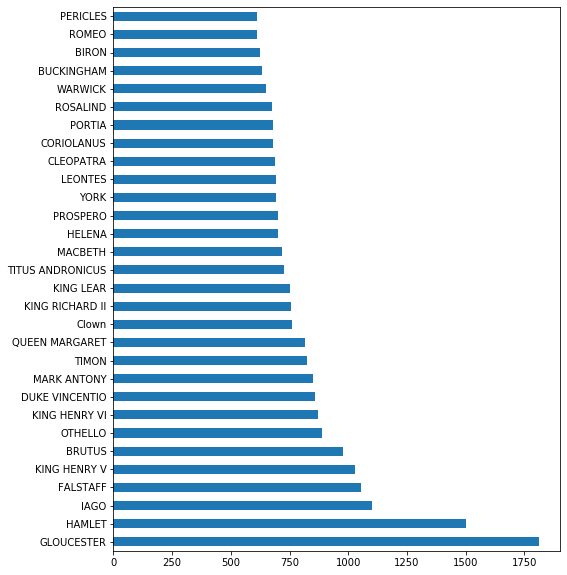

In [10]:
Player_Count.plot(kind='barh',label='Player Count Top 30',figsize=(8,10))

- Its good that we have at least 500 attributes for each player.
- Looking at the size of data we can expect an accuracy of 80% with some good machine learning classification models.

#### Let's check data types of features and count of attributes

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105152 entries, 3 to 111394
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Dataline          105152 non-null  int64  
 1   Play              105152 non-null  object 
 2   PlayerLinenumber  105152 non-null  float64
 3   ActSceneLine      105152 non-null  object 
 4   Player            105152 non-null  object 
 5   PlayerLine        105152 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB
None


## Step 4: Feature Engineering

- Let's remove dataline feature which is just like an index for attributes.
- ActSceneLine is another feature which we have to extract into 3 individual features- Act, Scene, Line.
- Then we can remove the ActSceneLine feature.
- Also for now, it would be better not to use PlayerLine feature, this is a feature which can be experimented on in future, to improve our classification much more accurately and meaningfully.

In [12]:
transformed_data= data.drop('Dataline',axis=1)

asl=transformed_data['ActSceneLine'].str.split('.',n=-1,expand=True) # We are going to split act scene and line

transformed_data['act']=asl[0]
transformed_data['scene']=asl[1]
transformed_data['line']=asl[2]
print(transformed_data.head(10))
transformed_data=transformed_data.drop(['ActSceneLine'],axis=1)
noplayerline_transformed_data=transformed_data.drop(['PlayerLine'],axis=1)


        Play  PlayerLinenumber ActSceneLine         Player  \
3   Henry IV               1.0        1.1.1  KING HENRY IV   
4   Henry IV               1.0        1.1.2  KING HENRY IV   
5   Henry IV               1.0        1.1.3  KING HENRY IV   
6   Henry IV               1.0        1.1.4  KING HENRY IV   
7   Henry IV               1.0        1.1.5  KING HENRY IV   
8   Henry IV               1.0        1.1.6  KING HENRY IV   
9   Henry IV               1.0        1.1.7  KING HENRY IV   
10  Henry IV               1.0        1.1.8  KING HENRY IV   
11  Henry IV               1.0        1.1.9  KING HENRY IV   
12  Henry IV               1.0       1.1.10  KING HENRY IV   

                                           PlayerLine act scene line  
3              So shaken as we are, so wan with care,   1     1    1  
4          Find we a time for frighted peace to pant,   1     1    2  
5      And breathe short-winded accents of new broils   1     1    3  
6             To be commenced in 

#### Let's use Label Encoder to convert Categorical Features- Play and Player to Numeric. 

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
noplayerline_transformed_data['Player']=le.fit_transform(noplayerline_transformed_data['Player'].astype('str'))
noplayerline_transformed_data['Play']=le.fit_transform(noplayerline_transformed_data['Play'].astype('str'))
noplayerline_transformed_data.tail(5)

,Play,PlayerLinenumber,Player,act,scene,line
111390,2,38.0,494,5,3,179
111391,2,38.0,494,5,3,180
111392,2,38.0,494,5,3,181
111393,2,38.0,494,5,3,182
111394,2,38.0,494,5,3,183


## Step 5: Player Classification

#### Lets shuffle attributes of dataset before training ML models

In [15]:
from sklearn.utils import shuffle
model_data=shuffle(noplayerline_transformed_data).reset_index(drop=True)
model_data.head()

,Play,PlayerLinenumber,Player,act,scene,line
0,2,46.0,313,2,3,185
1,9,6.0,663,3,2,141
2,3,29.0,313,3,6,87
3,12,2.0,459,2,1,5
4,11,13.0,911,5,4,58


#### For training model, we need to remove Player Feature for input

In [16]:
X=model_data.drop(['Player'],axis=1)
X.head(5)

,Play,PlayerLinenumber,act,scene,line
0,2,46.0,2,3,185
1,9,6.0,3,2,141
2,3,29.0,3,6,87
3,12,2.0,2,1,5
4,11,13.0,5,4,58


#### For training model, we need to convert Player feature into an array for output

In [17]:
y=model_data[['Player']]
y=np.ravel(y)
y

array([313, 663, 313, ..., 458, 554, 334])

#### Let's use train_test_split function to divide whole dataset for training and testing

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.2)

## Decision Tree Classifier
- A Decision Tree is a simple representation for classifying 

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.79


### An accuracy of 79% is good for test data
- Clearly Decision Tree Classifier performed well


## K- Nearest Neighbors Classifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.53


### An accuracy of 53% by KNN Classifier is not too bad.

## Gaussian Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.23
Accuracy of GNB classifier on test set: 0.22


### Naive Bayes Classifier clearly performed the worst with only 22% accuracy.

## Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfc.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfc.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.82


### We have the best performing Classification Model-Random Forest Classifier with an accuracy of 82%


## Conclusions and further improvements:

- We could obtain an accuracy of 82% with only a part of Shakespeare plays dataset.
- Definitely if we could make proper use of PlayerLine feature, we could greatly improve our Classification models' accuracy.
- We can use word cloud, word to Vector, RNN to improve in future.